<a href="https://colab.research.google.com/github/Tanjib-Rafi/Multiple-Linear-Regression/blob/main/50startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import numpy as np
import pandas as pd
import sklearn

In [87]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [88]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [89]:
print(X)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [90]:
states = pd.get_dummies(X['State'], drop_first = True) #drop_first = True means we are dropping 1st column that has been created by get_dummies to avoid dummy variable trap
X = X.drop('State', axis = 1)
X = pd.concat([X,states], axis = 1)
print(X)

    R&D Spend  Administration  Marketing Spend  Florida  New York
0   165349.20       136897.80        471784.10        0         1
1   162597.70       151377.59        443898.53        0         0
2   153441.51       101145.55        407934.54        1         0
3   144372.41       118671.85        383199.62        0         1
4   142107.34        91391.77        366168.42        1         0
5   131876.90        99814.71        362861.36        0         1
6   134615.46       147198.87        127716.82        0         0
7   130298.13       145530.06        323876.68        1         0
8   120542.52       148718.95        311613.29        0         1
9   123334.88       108679.17        304981.62        0         0
10  101913.08       110594.11        229160.95        1         0
11  100671.96        91790.61        249744.55        0         0
12   93863.75       127320.38        249839.44        1         0
13   91992.39       135495.07        252664.93        0         0
14  119943

In [91]:
y.shape

(50,)

In [92]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.values.reshape(-1,1))

In [93]:
y.shape

(50, 1)

In [94]:
X

array([[1.        , 0.65174393, 1.        , 0.        , 1.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.        , 0.        ],
       [0.92798459, 0.37957895, 0.8646636 , 1.        , 0.        ],
       [0.87313643, 0.51299839, 0.81223513, 0.        , 1.        ],
       [0.85943772, 0.30532804, 0.77613557, 1.        , 0.        ],
       [0.797566  , 0.3694479 , 0.76912588, 0.        , 1.        ],
       [0.81412828, 0.73016111, 0.27071031, 0.        , 0.        ],
       [0.7880179 , 0.71745725, 0.68649342, 1.        , 0.        ],
       [0.72901786, 0.74173276, 0.66049977, 0.        , 1.        ],
       [0.74590551, 0.43692884, 0.64644319, 0.        , 0.        ],
       [0.61635061, 0.45150637, 0.48573267, 1.        , 0.        ],
       [0.60884455, 0.30836422, 0.52936195, 0.        , 0.        ],
       [0.56766982, 0.57883556, 0.52956308, 1.        , 0.        ],
       [0.55635219, 0.64106561, 0.53555202, 0.        , 0.        ],
       [0.72539353, 0.8013272 , 0.

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [96]:
X_train.shape

(35, 5)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [98]:
model = Sequential()
model.add(Dense(128, input_dim=5, activation='relu', name='input_layer'))
model.add(Dense(64, activation='relu', name='hidden_layer_1'))
model.add(Dense(1, name='output_layer'))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])

In [99]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               768       
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [100]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 10)

Epoch 1/30
4/4 [==============================] - 0s 4ms/step - loss: 0.2198 - mean_squared_error: 0.2198
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 0.0816 - mean_squared_error: 0.0816
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 6/30
4/4 [==============================] - 0s 3ms/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 8/30
4/4 [==============================] - 0s 4ms/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 9/30
4/4 [==============================] - 0s 4ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 10/30
4/4 [=============================

In [101]:
acd = history.history['mean_squared_error']
loss = history.history['loss']

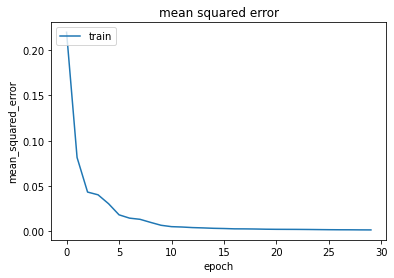

<Figure size 432x288 with 0 Axes>

In [102]:
from matplotlib import pyplot as plt
plt.plot(acd)
plt.title('mean squared error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('mean_squared_error.png')

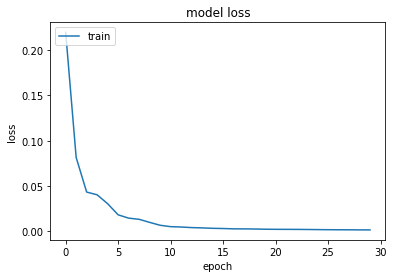

<Figure size 432x288 with 0 Axes>

In [103]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('loss_curve.png')

In [104]:
history_test = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 111ms/step - loss: 0.0028 - mean_squared_error: 0.0028


In [105]:
history_test

[0.0027847157325595617, 0.0027847157325595617]